In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder

In [2]:
df_errors = pd.read_csv(r"F:\Maestria\Recuperacion\Planning_2\ERROR.csv",sep=';')
df_failures = pd.read_csv(r"F:\Maestria\Recuperacion\Planning_2\FAILURE.csv",sep=';')
df_machines = pd.read_csv(r"F:\Maestria\Recuperacion\Planning_2\MACHINE.csv",sep=';')
df_maint = pd.read_csv(r"F:\Maestria\Recuperacion\Planning_2\MANTTO.csv",sep=';')
df_telemetry = pd.read_csv(r"F:\Maestria\Recuperacion\Planning_2\SENSOR.csv",sep=';', on_bad_lines='skip')

In [3]:

df_errors["datetime"] = pd.to_datetime(df_errors["datetime"], format="%d/%m/%Y %H:%M")
df_failures["datetime"] = pd.to_datetime(df_failures["datetime"], format="%d/%m/%Y %H:%M")
df_maint["datetime"] = pd.to_datetime(df_maint["datetime"], format="%d/%m/%Y %H:%M")
df_telemetry["datetime"] = pd.to_datetime(df_telemetry["datetime"], format="%d/%m/%Y %H:%M")

#### Observando la información de la data

### ERRORS

In [4]:
df_errors.head(5)

,datetime,machineID,errorID
0,2021-01-12 14:00:00,42,ERROR4
1,2021-02-06 10:00:00,42,ERROR4
2,2021-02-11 11:00:00,42,ERROR1
3,2021-03-11 22:00:00,42,ERROR2
4,2021-03-18 06:00:00,42,ERROR1


In [5]:
for x in df_errors.columns:
    print(x,"      ",df_errors[x].nunique())

datetime        1439
machineID        47
errorID        5


In [6]:
for x in df_errors.columns:
    print(x,"      ",df_errors[x].isna().sum())

datetime        0
machineID        0
errorID        0


In [7]:
df_errors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1830 entries, 0 to 1829
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   datetime   1830 non-null   datetime64[ns]
 1   machineID  1830 non-null   int64         
 2   errorID    1830 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 43.0+ KB


Observamos que "DATE" osease FECHA está como tipo objeto, deberíamos pasarlo a tipo:Date. Por último "errorID" podemos pasarlo a string o simplemente luego se convierte e un One Hot Encoder.

In [8]:
df_errors.describe()

,datetime,machineID
count,1830,1830.000000
mean,2021-06-28 16:20:49.180327936,23.875410
min,2021-01-01 06:00:00,1.000000
25%,2021-03-31 04:30:00,13.000000
50%,2021-06-28 08:30:00,23.000000
75%,2021-09-27 04:00:00,35.000000
max,2021-12-31 20:00:00,47.000000
std,NaN,13.308133


In [9]:
for x in df_errors.columns:
    print(x,"      ",df_errors[x].value_counts())

datetime        datetime
2021-01-18 06:00:00    7
2021-04-04 06:00:00    7
2021-04-01 06:00:00    6
2021-05-30 06:00:00    6
2021-06-30 06:00:00    6
                      ..
2021-06-25 03:00:00    1
2021-05-13 08:00:00    1
2021-05-05 15:00:00    1
2021-05-05 06:00:00    1
2021-12-27 22:00:00    1
Name: count, Length: 1439, dtype: int64
machineID        machineID
46    54
17    50
15    50
22    47
19    46
43    46
23    46
12    45
32    45
6     45
16    45
31    45
18    44
25    44
39    43
13    43
8     42
1     42
40    42
26    41
34    41
21    40
28    40
44    39
14    39
4     39
24    38
9     38
33    38
11    37
20    37
10    37
45    37
38    36
27    35
41    34
35    33
30    32
2     31
5     31
36    31
3     31
29    30
47    28
42    28
7     23
37    22
Name: count, dtype: int64
errorID        errorID
ERROR1    492
ERROR2    455
ERROR3    387
ERROR4    327
ERROR5    169
Name: count, dtype: int64


Text(0.5, 1.0, 'Errores_ID')

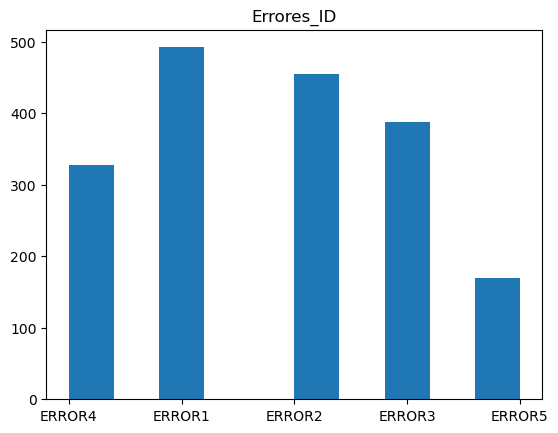

In [10]:
plt.hist(df_errors["errorID"])
plt.xlabel("")
plt.ylabel("")
plt.title("Errores_ID")

Podemos ordenar la columna de errores de acuerdo a cantidades para ver la distribución de la data categórica. Cuando se observa data categórica usualmente buscamos data perfectamente distrubuida, en este caso la data está correctamente distribuida, quizás el "error5" nos dice que tenemos un poco de "feature imbalance"

In [97]:
df = df_errors.sort_values(by=['datetime'])

OHE_df = pd.get_dummies(df, columns =  ["errorID"], dtype=int)

OHE_df.columns = ["datetime", "machineID", "error1", "error2", "error3", "error4", "error5"]

In [98]:
OHE_df

,datetime,machineID,error1,error2,error3,error4,error5
1160,2021-01-01 06:00:00,4,0,0,0,1,0
206,2021-01-01 08:00:00,9,0,0,0,1,0
627,2021-01-01 10:00:00,24,0,1,0,0,0
1118,2021-01-01 12:00:00,1,0,1,0,0,0
1740,2021-01-01 12:00:00,16,0,0,1,0,0
...,...,...,...,...,...,...,...
1582,2021-12-30 06:00:00,26,1,0,0,0,0
1072,2021-12-30 06:00:00,20,1,0,0,0,0
1404,2021-12-31 15:00:00,18,0,0,1,0,0
1624,2021-12-31 18:00:00,8,0,0,0,1,0


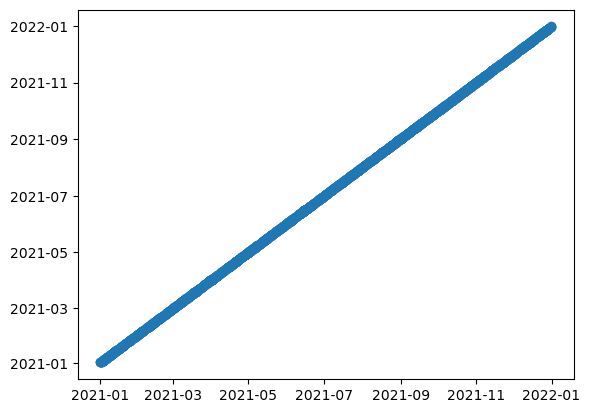

In [13]:
plt.scatter(OHE_df.datetime,OHE_df.datetime)
# plt.plot(OHE_df.datetime, OHE_df['errorID_error2'])
# plt.plot(OHE_df.datetime, OHE_df['errorID_error3'])
# plt.plot(OHE_df.datetime, OHE_df['errorID_error4'])
# plt.plot(OHE_df.datetime, OHE_df['errorID_error5'])

Text(0.5, 1.0, 'Máquinas con más errores')

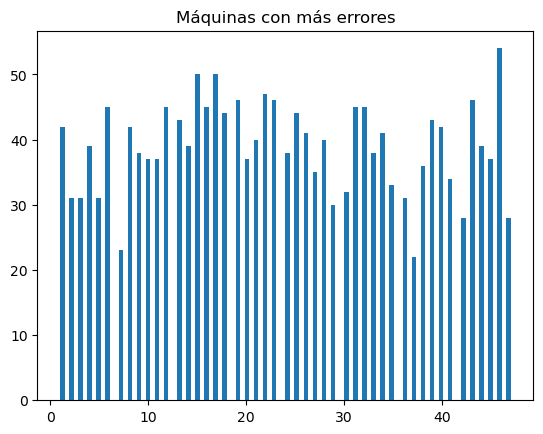

In [14]:
plt.hist(df_errors["machineID"], bins=100)
plt.xlabel("")
plt.ylabel("")
plt.title("Máquinas con más errores")

Distribución regular de errores por cada máquina.

### Failures

In [15]:
df_failures.head()

,datetime,machineID,failure
0,2021-03-19 06:00:00,42,PART01
1,2021-03-19 06:00:00,42,PART02
2,2021-04-18 06:00:00,42,PART02
3,2021-12-29 06:00:00,42,PART02
4,2021-01-07 06:00:00,44,PART02


In [16]:
for x in df_failures.columns:
    print(x,"      ",df_failures[x].nunique())

datetime        204
machineID        45
failure        4


In [17]:
for x in df_failures.columns:
    print(x,"      ",df_failures[x].isna().sum())

datetime        0
machineID        0
failure        0


In [18]:
df_failures.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354 entries, 0 to 353
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   datetime   354 non-null    datetime64[ns]
 1   machineID  354 non-null    int64         
 2   failure    354 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 8.4+ KB


Observamos que *"DATE"* osease FECHA está como tipo objeto, deberíamos pasarlo a tipo:Date. Por último failure podemos pasarlo a string o simplemente luego se convierte e un One Hot Encoder.

In [19]:
for x in df_failures.columns:
    print(x,"      ",df_failures[x].value_counts())

datetime        datetime
2021-01-02 03:00:00    9
2021-04-02 06:00:00    5
2021-04-05 06:00:00    5
2021-01-19 06:00:00    5
2021-02-19 06:00:00    4
                      ..
2021-12-26 06:00:00    1
2021-10-15 06:00:00    1
2021-01-15 06:00:00    1
2021-08-02 06:00:00    1
2021-11-26 06:00:00    1
Name: count, Length: 204, dtype: int64
machineID        machineID
6     16
25    14
39    14
32    13
22    13
34    13
4     12
10    12
26    12
33    11
17    10
15    10
21    10
46     9
45     9
12     9
28     9
24     9
16     8
20     8
27     8
11     8
23     8
47     7
43     7
29     7
13     7
40     6
2      6
5      6
8      6
38     6
14     5
31     5
44     5
18     5
19     5
9      4
30     4
41     4
42     4
3      3
36     3
1      2
35     2
Name: count, dtype: int64
failure        failure
PART02    125
PART01     89
PART04     81
PART03     59
Name: count, dtype: int64


Text(0.5, 1.0, 'Componente que falla')

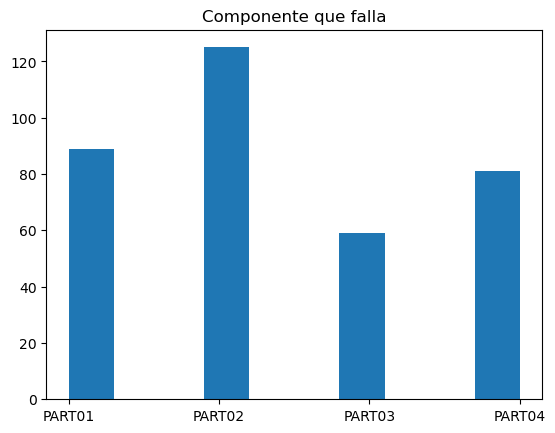

In [20]:
plt.hist(df_failures["failure"])
plt.xlabel("")
plt.ylabel("")
plt.title("Componente que falla")

Vemos una distribución buena (viendo "buena" como algo cerca pero no tan cerca a la distribución perfecta). Además el componente que más falla es el comp2 y el que menos falla es el comp3.

### Maquinas

In [21]:
df_machines.head()

,machineID,model,age
0,1,JACQUARD TF,2
1,2,NOVA 6HS,7
2,3,NOVA 6HS,9
3,4,ALPHA 560 UNIVERSAL,20
4,5,NOVA 6HS,18


In [22]:
for x in df_machines.columns:
    print(x,"      ",df_machines[x].nunique())

machineID        47
model        4
age        17


In [23]:
for x in df_machines.columns:
    print(x,"      ",df_machines[x].isna().sum())

machineID        0
model        0
age        0


In [24]:
df_machines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   machineID  47 non-null     int64 
 1   model      47 non-null     object
 2   age        47 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


Observamos que "DATE" osease FECHA está como tipo objeto, deberíamos pasarlo a tipo:Date. Por último "model" podemos pasarlo a string o simplemente luego se convierte e un One Hot Encoder.

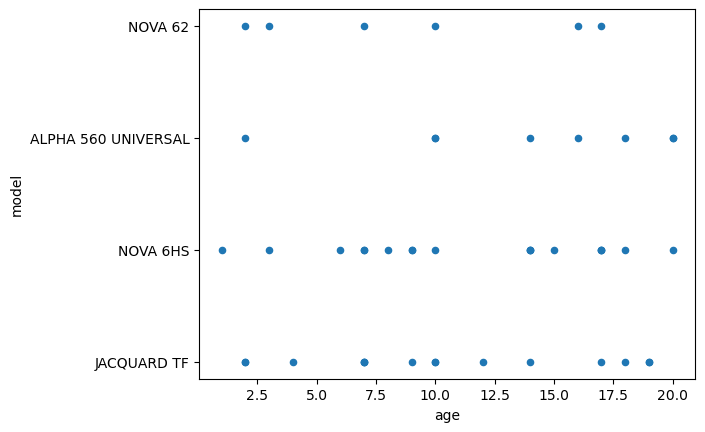

In [25]:
df_machines.plot(kind='scatter', x='age', y='model')
plt.show()

<Axes: xlabel='age'>

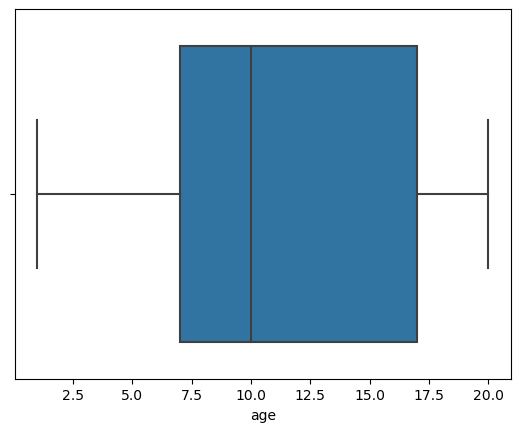

In [26]:
sns.boxplot(x='age', data=df_machines)

Text(0.5, 1.0, 'Cuántas máquinas tenemos y cual es la edad')

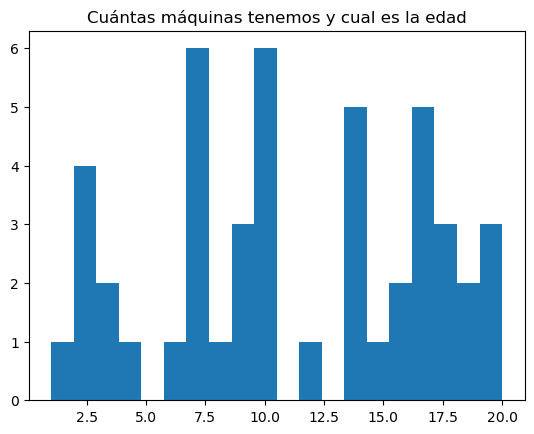

In [27]:
plt.hist(df_machines["age"], bins= 20)
plt.xlabel("")
plt.ylabel("")
plt.title("Cuántas máquinas tenemos y cual es la edad")

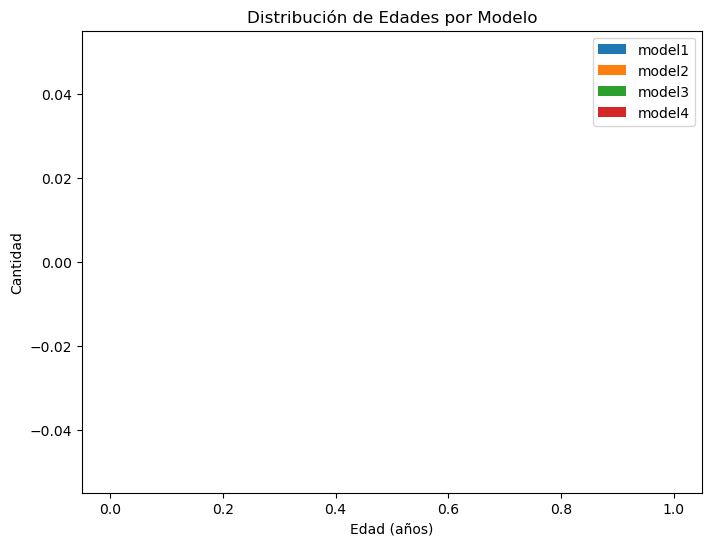

In [28]:
plt.figure(figsize=(8, 6))
_, bins, _ = plt.hist([
    df_machines.loc[df_machines["model"] == "model1", "age"],
    df_machines.loc[df_machines["model"] == "model2", "age"],
    df_machines.loc[df_machines["model"] == "model3", "age"],
    df_machines.loc[df_machines["model"] == "model4", "age"]],
    20, stacked=True, label=["model1", "model2", "model3", "model4"
])
plt.title("Distribución de Edades por Modelo")
plt.xlabel("Edad (años)")
plt.ylabel("Cantidad")
plt.legend()
plt.show()

In [29]:
df_machines.describe()

,machineID,age
count,47.000000,47.000000
mean,24.000000,11.234043
std,13.711309,5.816815
min,1.000000,1.000000
25%,12.500000,7.000000
50%,24.000000,10.000000
75%,35.500000,17.000000
max,47.000000,20.000000


### Mantenimiento

In [30]:
df_maint.head()

,datetime,machineID,comp
0,2020-07-31,1,PART01
1,2020-08-30,1,PART04
2,2020-10-29,1,PART02
3,2020-11-28,1,PART03
4,2021-01-23,1,PART03


In [31]:
for x in df_maint.columns:
    print(x,"      ",df_maint[x].nunique())

datetime        347
machineID        47
comp        4


In [32]:
for x in df_maint.columns:
    print(x,"      ",df_maint[x].isna().sum())

datetime        0
machineID        0
comp        0


In [33]:
df_maint.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1557 entries, 0 to 1556
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   datetime   1557 non-null   datetime64[ns]
 1   machineID  1557 non-null   int64         
 2   comp       1557 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 36.6+ KB


Observamos que "DATE" osease FECHA está como tipo objeto, deberíamos pasarlo a tipo:Date. Por último "comp" podemos pasarlo a string o simplemente luego se convierte e un One Hot Encoder.

Text(0.5, 1.0, 'A qué componentes se les dio Mtto.')

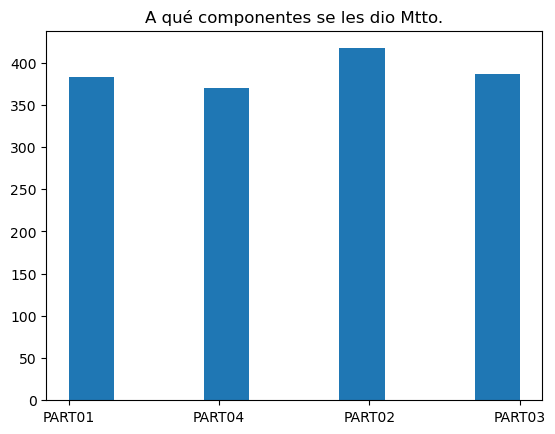

In [34]:
plt.hist(df_maint["comp"])
plt.xlabel("")
plt.ylabel("")
plt.title("A qué componentes se les dio Mtto.")

Distribución perfecta, **sin embargo, acá se debe ver cada cuánto se le dio el mantenimiento a cada componente.** Ya que eso es lo que puede otorgar pistas de posibles fallas en el futuro.

Además, podemos ver un "vs" de componentes con mtto vs componente que falla, lo que nos peude otorgar más pistas.

### Telemetry

In [35]:
df_telemetry.head()

,datetime,machineID,volt,rotate,pressure,vibration
0,2021-01-01 06:00:00,42,176.558913,424.624162,76.005332,43.767049
1,2021-01-01 07:00:00,42,158.282044,432.372960,110.907806,37.267114
2,2021-01-01 08:00:00,42,168.242028,454.629639,97.877007,39.709461
3,2021-01-01 09:00:00,42,180.280316,438.391022,84.440430,40.490443
4,2021-01-01 10:00:00,42,169.719531,473.055664,110.395683,41.229578


In [36]:
for x in df_telemetry.columns:
    print(x,"      ",df_telemetry[x].nunique())

datetime        8761
machineID        47
volt        411622
rotate        411726
pressure        411637
vibration        411732


In [37]:
for x in df_telemetry.columns:
    print(x,"      ",df_telemetry[x].isna().sum())

datetime        0
machineID        0
volt        0
rotate        0
pressure        0
vibration        0


No contamos con data Nula, pero tenemos que ver si hay data falsa o con errores de tipeo o sin sentido. Por ejemplo: Si vemos Carreras de Ingeniería y nos sale que no tenemos data "nula" pero vemos que hay "celdas" con data: "3#45##kja" podemos identificar a ese valor como un valor inservible para un análisis.

In [38]:
for x in df_telemetry.columns:
    print(x,"      ",df_telemetry[x].value_counts())

datetime        datetime
2021-01-01 06:00:00    53
2021-09-01 17:00:00    53
2021-09-01 11:00:00    53
2021-09-01 12:00:00    53
2021-09-01 13:00:00    53
                       ..
2021-05-02 17:00:00    53
2021-05-02 16:00:00    53
2021-05-02 15:00:00    53
2021-05-02 14:00:00    53
2022-01-01 06:00:00    53
Name: count, Length: 8761, dtype: int64
machineID        machineID
42    17522
2     17522
7     17522
28    17522
31    17522
44    17522
18     8761
20     8761
32     8761
1      8761
4      8761
38     8761
37     8761
46     8761
15     8761
13     8761
25     8761
27     8761
17     8761
26     8761
8      8761
12     8761
5      8761
14     8761
16     8761
41     8761
11     8761
35     8761
33     8761
9      8761
34     8761
23     8761
47     8761
22     8761
10     8761
40     8761
3      8761
45     8761
39     8761
36     8761
24     8761
30     8761
29     8761
21     8761
43     8761
19     8761
6      8761
Name: count, dtype: int64
volt        volt
172.840294    4

In [39]:
df_telemetry.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 464333 entries, 0 to 464332
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   datetime   464333 non-null  datetime64[ns]
 1   machineID  464333 non-null  int64         
 2   volt       464333 non-null  float64       
 3   rotate     464333 non-null  float64       
 4   pressure   464333 non-null  float64       
 5   vibration  464333 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 21.3 MB


Observamos que "DATE" osease FECHA está como tipo objeto, deberíamos pasarlo a tipo:Date. 

In [40]:
df_telemetry.describe()

,datetime,machineID,volt,rotate,pressure,vibration
count,464333,464333.000000,464333.000000,464333.000000,464333.000000,464333.000000
mean,2021-07-02 18:00:00,24.188679,170.740891,446.619580,100.828395,40.383962
min,2021-01-01 06:00:00,1.000000,97.333604,138.432075,54.170030,16.222680
25%,2021-04-02 12:00:00,12.000000,160.274204,412.312870,93.488900,36.790580
50%,2021-07-02 18:00:00,25.000000,170.559298,447.625349,100.410390,40.241419
75%,2021-10-02 00:00:00,36.000000,180.985259,482.224670,107.536601,43.784635
max,2022-01-01 06:00:00,47.000000,246.419957,675.685691,185.951998,76.791072
std,NaN,13.878268,15.491646,52.710742,10.995171,5.350090


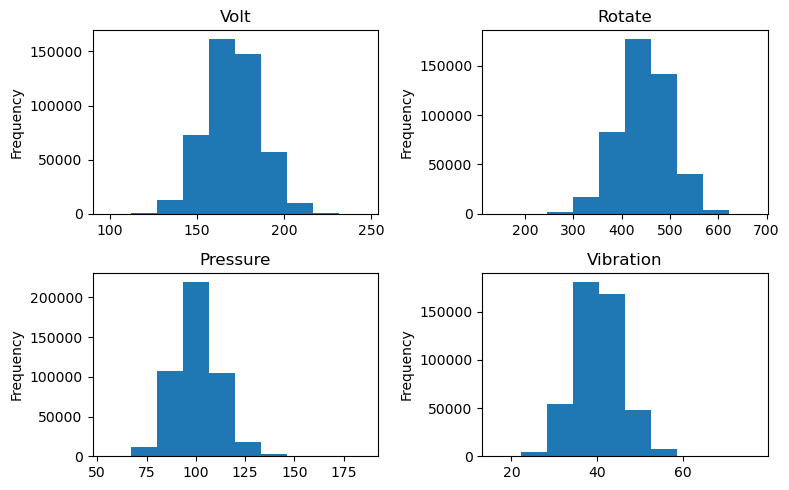

In [41]:
fig, axarr = plt.subplots(2, 2, figsize=(8, 5))

df_telemetry['volt'].plot.hist(ax=axarr[0,0], title='Volt')
df_telemetry['rotate'].plot.hist(ax=axarr[0,1], title='Rotate')
df_telemetry['pressure'].plot.hist(ax=axarr[1,0], title='Pressure')
df_telemetry['vibration'].plot.hist(ax=axarr[1,1], title='Vibration')

plt.tight_layout()
plt.show()

Distribuciones normales, pero no sabemos por qué hay exceso de voltajes, vibraciones, presión, rotación. Quizás pueda ser las CAUSAS por las cuales las máquinas fallan, o componentes que fallaron y CAUSARON esos EXCESOS.

<Axes: >

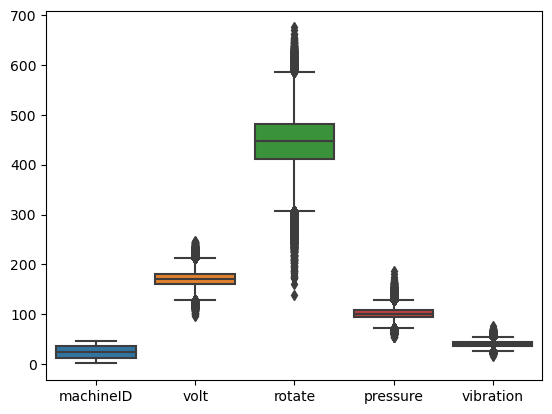

In [42]:
sns.boxplot(data=df_telemetry)

Existen outliers.

# P1. ¿Qué problema podríamos abordar en estos datos?

- Observamos que "DATE" osease FECHA está como tipo objeto, deberíamos pasarlo a tipo: Date. 
- Manejar el feature imbalance del "error5". Aunque en entornos reales de trabajo o investigación, no se peude cumplir con la búsqueda de nueva data, solamente queda duplicar la data minoritaria o dejarla tal cual y trabajar con ella.
- Podemos ver qué razones hay para que existan errores en las máquinas.

# P2. ¿Cuántos registros tenemos?

- Errores : 3919
- Failures: 761
- Machines: 100
- Telemetry: 968587

La cantidad de datos de cada dataframe tiene sentido.

# P3. ¿Cuál es el significado de los atributos o campos?

Errors:
* datetime: Fecha con hora.
* machineID: ID de la máquina.
* errorID: ID del error.

Failure:
* datetime: Fecha con hora.
* machineID: ID de la máquina.
* failure: componente que falla.

Machines:
* machineID: ID de la máquina.
* model: Modelo de la maquina.
* age: cuantos años tiene la maquina.

Maint:
* datetime: Fecha con hora.
* machineID: ID de la máquina.
* comp: componente al que se le dio mantenimiento.

Telemetry:
* datetime: Fecha con hora.
* machineID: ID de la máquina
* volt: Voltaje de la máquina capturado en una determinada ventana de tiempo
* rotate: Rotación de la máquina capturado en una determinada ventana de tiempo
* pressure: Presión de la máquina capturado en una determinada ventana de tiempo
* vibration: Vibración de la máquina capturado en una determinada ventana de tiempo

# P4. ¿Existen registros que necesitan limpieza?

Si existen registros que necesitan limpieza, los registros de las columnas "datetime" de cada tabla.
Las columnas "machineId" puede ser una variable con alta cardinalidad, ya que tenemos 100 máquinas diferentes.

# **P5. Resumen de los datos**



In [43]:
df_errors.describe()

,datetime,machineID
count,1830,1830.000000
mean,2021-06-28 16:20:49.180327936,23.875410
min,2021-01-01 06:00:00,1.000000
25%,2021-03-31 04:30:00,13.000000
50%,2021-06-28 08:30:00,23.000000
75%,2021-09-27 04:00:00,35.000000
max,2021-12-31 20:00:00,47.000000
std,NaN,13.308133


In [44]:
df_failures.describe()

,datetime,machineID
count,354,354.000000
mean,2021-06-21 17:14:44.745762816,23.923729
min,2021-01-02 03:00:00,1.000000
25%,2021-03-20 12:00:00,13.000000
50%,2021-06-23 18:00:00,24.000000
75%,2021-09-14 06:00:00,33.750000
max,2021-12-31 06:00:00,47.000000
std,NaN,12.820281


In [45]:
df_machines.describe()

,machineID,age
count,47.000000,47.000000
mean,24.000000,11.234043
std,13.711309,5.816815
min,1.000000,1.000000
25%,12.500000,7.000000
50%,24.000000,10.000000
75%,35.500000,17.000000
max,47.000000,20.000000


In [46]:
df_maint.describe()

,datetime,machineID
count,1557,1557.000000
mean,2021-05-31 00:25:53.757225472,23.996146
min,2020-06-01 00:00:00,1.000000
25%,2021-03-03 00:00:00,12.000000
50%,2021-06-16 00:00:00,24.000000
75%,2021-09-18 00:00:00,36.000000
max,2022-01-01 00:00:00,47.000000
std,NaN,13.560395


In [47]:
df_telemetry.describe()

,datetime,machineID,volt,rotate,pressure,vibration
count,464333,464333.000000,464333.000000,464333.000000,464333.000000,464333.000000
mean,2021-07-02 18:00:00,24.188679,170.740891,446.619580,100.828395,40.383962
min,2021-01-01 06:00:00,1.000000,97.333604,138.432075,54.170030,16.222680
25%,2021-04-02 12:00:00,12.000000,160.274204,412.312870,93.488900,36.790580
50%,2021-07-02 18:00:00,25.000000,170.559298,447.625349,100.410390,40.241419
75%,2021-10-02 00:00:00,36.000000,180.985259,482.224670,107.536601,43.784635
max,2022-01-01 06:00:00,47.000000,246.419957,675.685691,185.951998,76.791072
std,NaN,13.878268,15.491646,52.710742,10.995171,5.350090


# P7. Visualizaciones para dar sentido a los datos.

#### CORRELACION

### TELEMETRY

<Axes: >

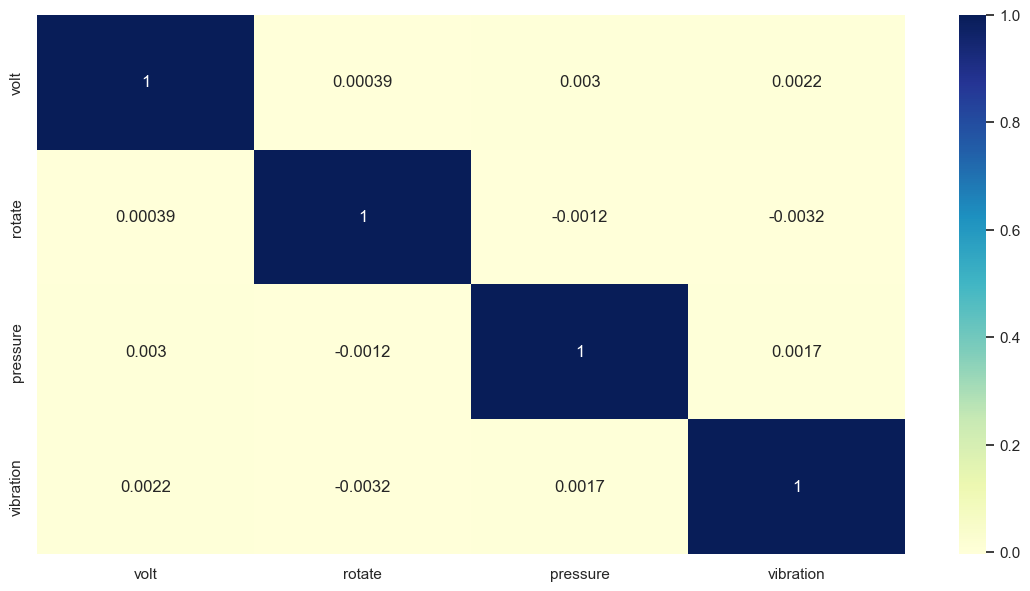

In [48]:
devo_1 = df_telemetry[['volt', 'rotate', 'pressure', 'vibration']]
sns.set(rc={'figure.figsize':(14,7)})
sns.heatmap(devo_1.corr(numeric_only=True), annot= True, cmap='YlGnBu')

#### Para ver el resto de correlaciones, se debe juntar las tablas

In [49]:
df_errors.head()

,datetime,machineID,errorID
0,2021-01-12 14:00:00,42,ERROR4
1,2021-02-06 10:00:00,42,ERROR4
2,2021-02-11 11:00:00,42,ERROR1
3,2021-03-11 22:00:00,42,ERROR2
4,2021-03-18 06:00:00,42,ERROR1


In [50]:
df_failures.head()

,datetime,machineID,failure
0,2021-03-19 06:00:00,42,PART01
1,2021-03-19 06:00:00,42,PART02
2,2021-04-18 06:00:00,42,PART02
3,2021-12-29 06:00:00,42,PART02
4,2021-01-07 06:00:00,44,PART02


In [51]:
df_machines.head()

,machineID,model,age
0,1,JACQUARD TF,2
1,2,NOVA 6HS,7
2,3,NOVA 6HS,9
3,4,ALPHA 560 UNIVERSAL,20
4,5,NOVA 6HS,18


In [52]:
df_maint.head()

,datetime,machineID,comp
0,2020-07-31,1,PART01
1,2020-08-30,1,PART04
2,2020-10-29,1,PART02
3,2020-11-28,1,PART03
4,2021-01-23,1,PART03


In [53]:
result = pd.merge(df_failures, df_machines, how="inner", on=["machineID"])

In [54]:
result

,datetime,machineID,failure,model,age
0,2021-03-19 06:00:00,42,PART01,JACQUARD TF,7
1,2021-03-19 06:00:00,42,PART02,JACQUARD TF,7
2,2021-04-18 06:00:00,42,PART02,JACQUARD TF,7
3,2021-12-29 06:00:00,42,PART02,JACQUARD TF,7
4,2021-01-07 06:00:00,44,PART02,NOVA 6HS,8
...,...,...,...,...,...
349,2021-07-29 06:00:00,6,PART03,ALPHA 560 UNIVERSAL,20
350,2021-08-13 06:00:00,6,PART01,ALPHA 560 UNIVERSAL,20
351,2021-08-28 06:00:00,6,PART02,ALPHA 560 UNIVERSAL,20
352,2021-10-27 06:00:00,6,PART02,ALPHA 560 UNIVERSAL,20


Al parecer el modelo con más fallas es el "model3" pero no se ve una gran diferencia entre el resto.

Para poder visualizar la correlación debemos hacer un "one hot encode" de las columnas "categóricas"

In [55]:
from sklearn.preprocessing import LabelEncoder

one_hot_encoded_data = pd.get_dummies(result, columns =  ["failure","model"], dtype=int)


# labelencoder = LabelEncoder()

# cat_cols = ["failure","model"]

# for col in cat_cols:
#     result[col] = labelencoder.fit_transform(result[col])

In [56]:
one_hot_encoded_data

,datetime,machineID,age,failure_PART01,failure_PART02,failure_PART03,failure_PART04,model_ALPHA 560 UNIVERSAL,model_JACQUARD TF,model_NOVA 62,model_NOVA 6HS
0,2021-03-19 06:00:00,42,7,1,0,0,0,0,1,0,0
1,2021-03-19 06:00:00,42,7,0,1,0,0,0,1,0,0
2,2021-04-18 06:00:00,42,7,0,1,0,0,0,1,0,0
3,2021-12-29 06:00:00,42,7,0,1,0,0,0,1,0,0
4,2021-01-07 06:00:00,44,8,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
349,2021-07-29 06:00:00,6,20,0,0,1,0,1,0,0,0
350,2021-08-13 06:00:00,6,20,1,0,0,0,1,0,0,0
351,2021-08-28 06:00:00,6,20,0,1,0,0,1,0,0,0
352,2021-10-27 06:00:00,6,20,0,1,0,0,1,0,0,0


In [57]:
one_hot_encoded_data = one_hot_encoded_data.drop(['datetime'], axis=1)

<Axes: >

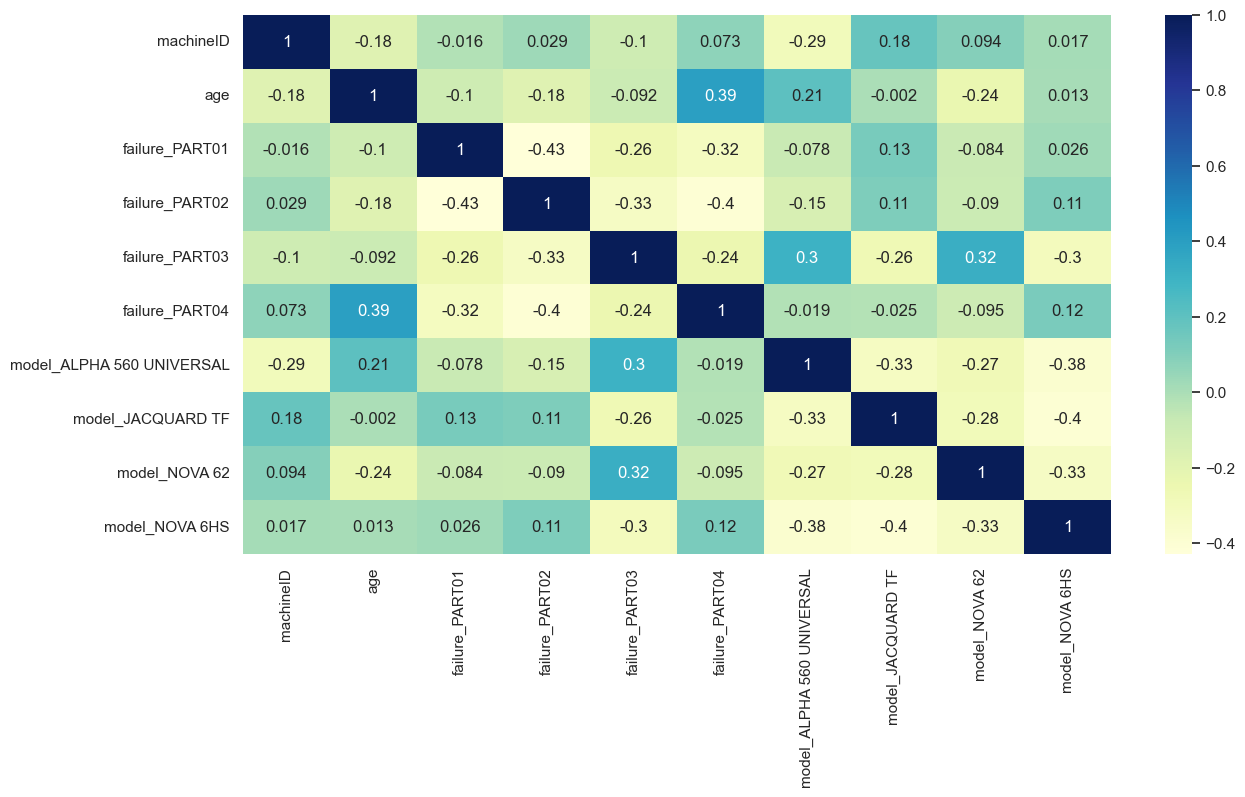

In [58]:
devo_2 = one_hot_encoded_data
sns.set(rc={'figure.figsize':(14,7)})
sns.heatmap(devo_2.corr(numeric_only=False), annot= True, cmap='YlGnBu')

Prácticamente no vemos ninguna correlación.

In [59]:
result.head(2)

,datetime,machineID,failure,model,age
0,2021-03-19 06:00:00,42,PART01,JACQUARD TF,7
1,2021-03-19 06:00:00,42,PART02,JACQUARD TF,7


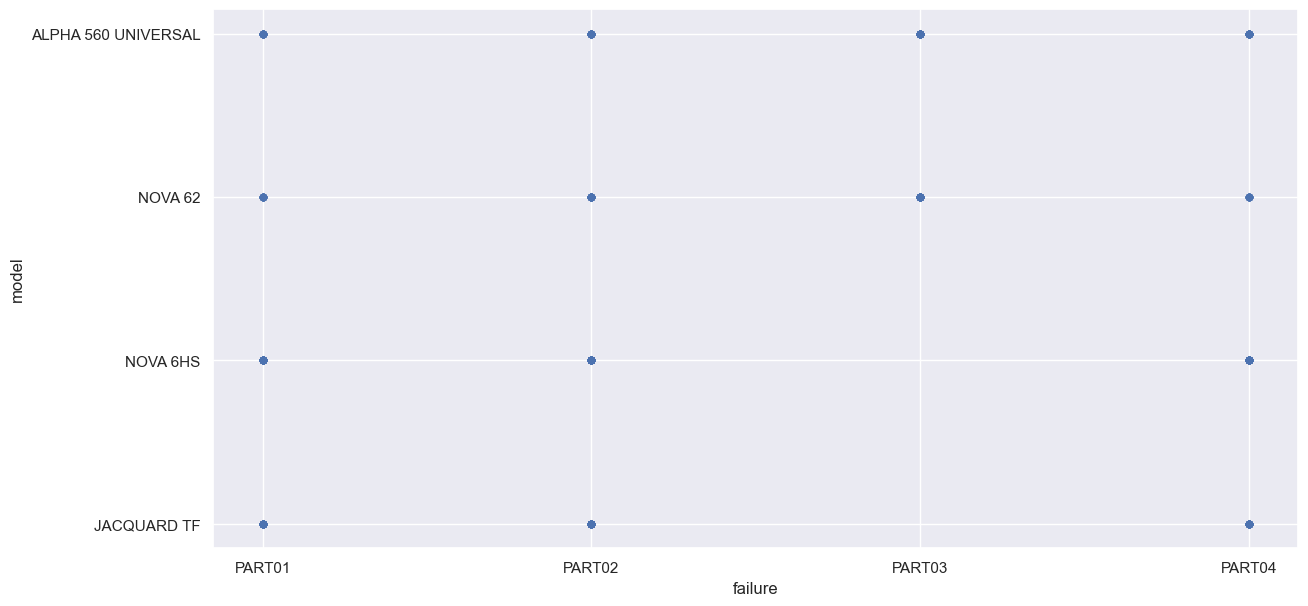

In [60]:
result.plot(kind='scatter', x='failure', y='model')
plt.show()

Es claro que el modelo4 y el modelo3 no cuentan con el "comp3". Sin embargo, las máquinas más viejas son de modelos 4 y 3 y es el comp2 el que suele FALLAR MAS, y el Modelo 3, también, es el que más falla. **Pero no tenemos suficiente información como para obtener una conclusión.**

Podemos ver también que hay correlación mínima pero negativa entre model3 ymodel4 con comp3, tiene sentido ya que carecen de este.

Text(0.5, 1.0, 'Que MODELO falla mas')

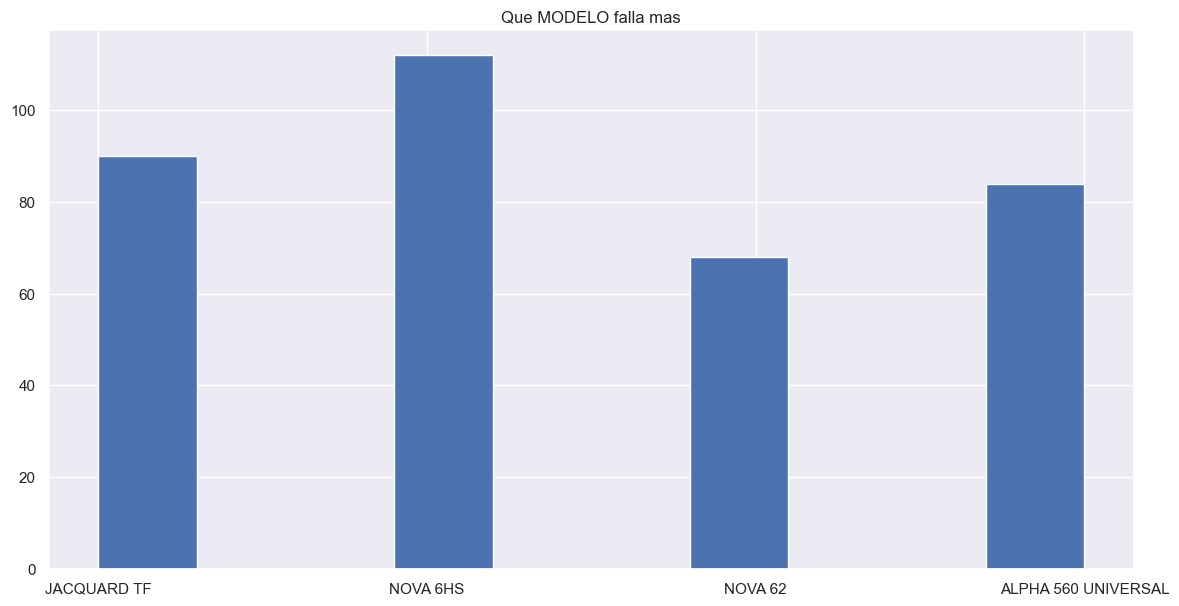

In [61]:
plt.hist(result["model"])
plt.xlabel("")
plt.ylabel("")
plt.title("Que MODELO falla mas")

Text(0.5, 1.0, 'Fallas vs EDAD de la máquina')

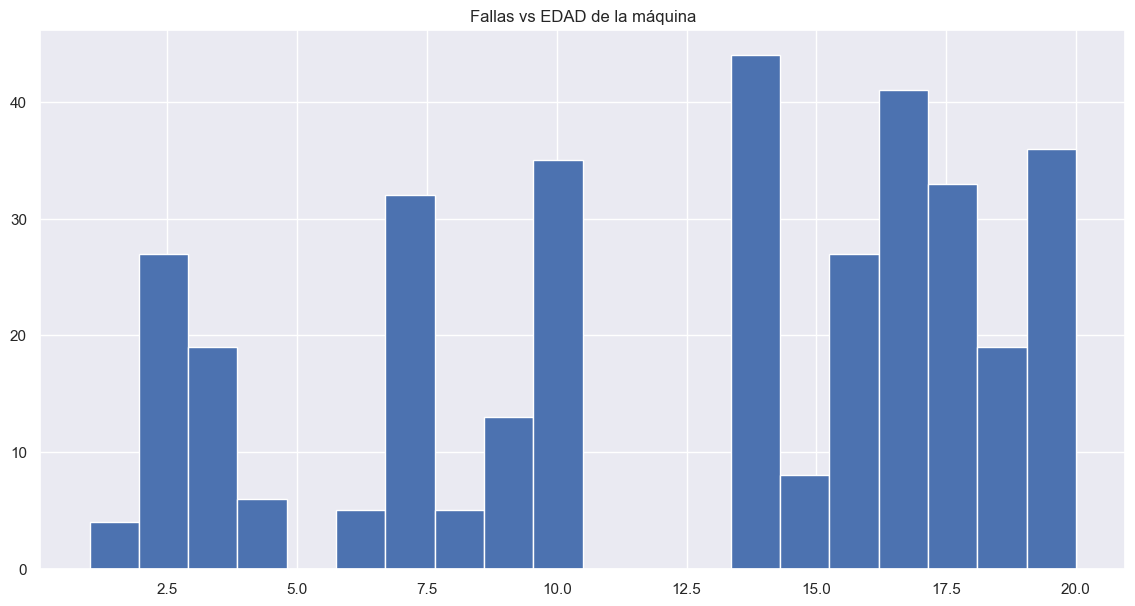

In [62]:
plt.hist(result["age"],bins=20)
plt.xlabel("")
plt.ylabel("")
plt.title("Fallas vs EDAD de la máquina")

### Covarianza

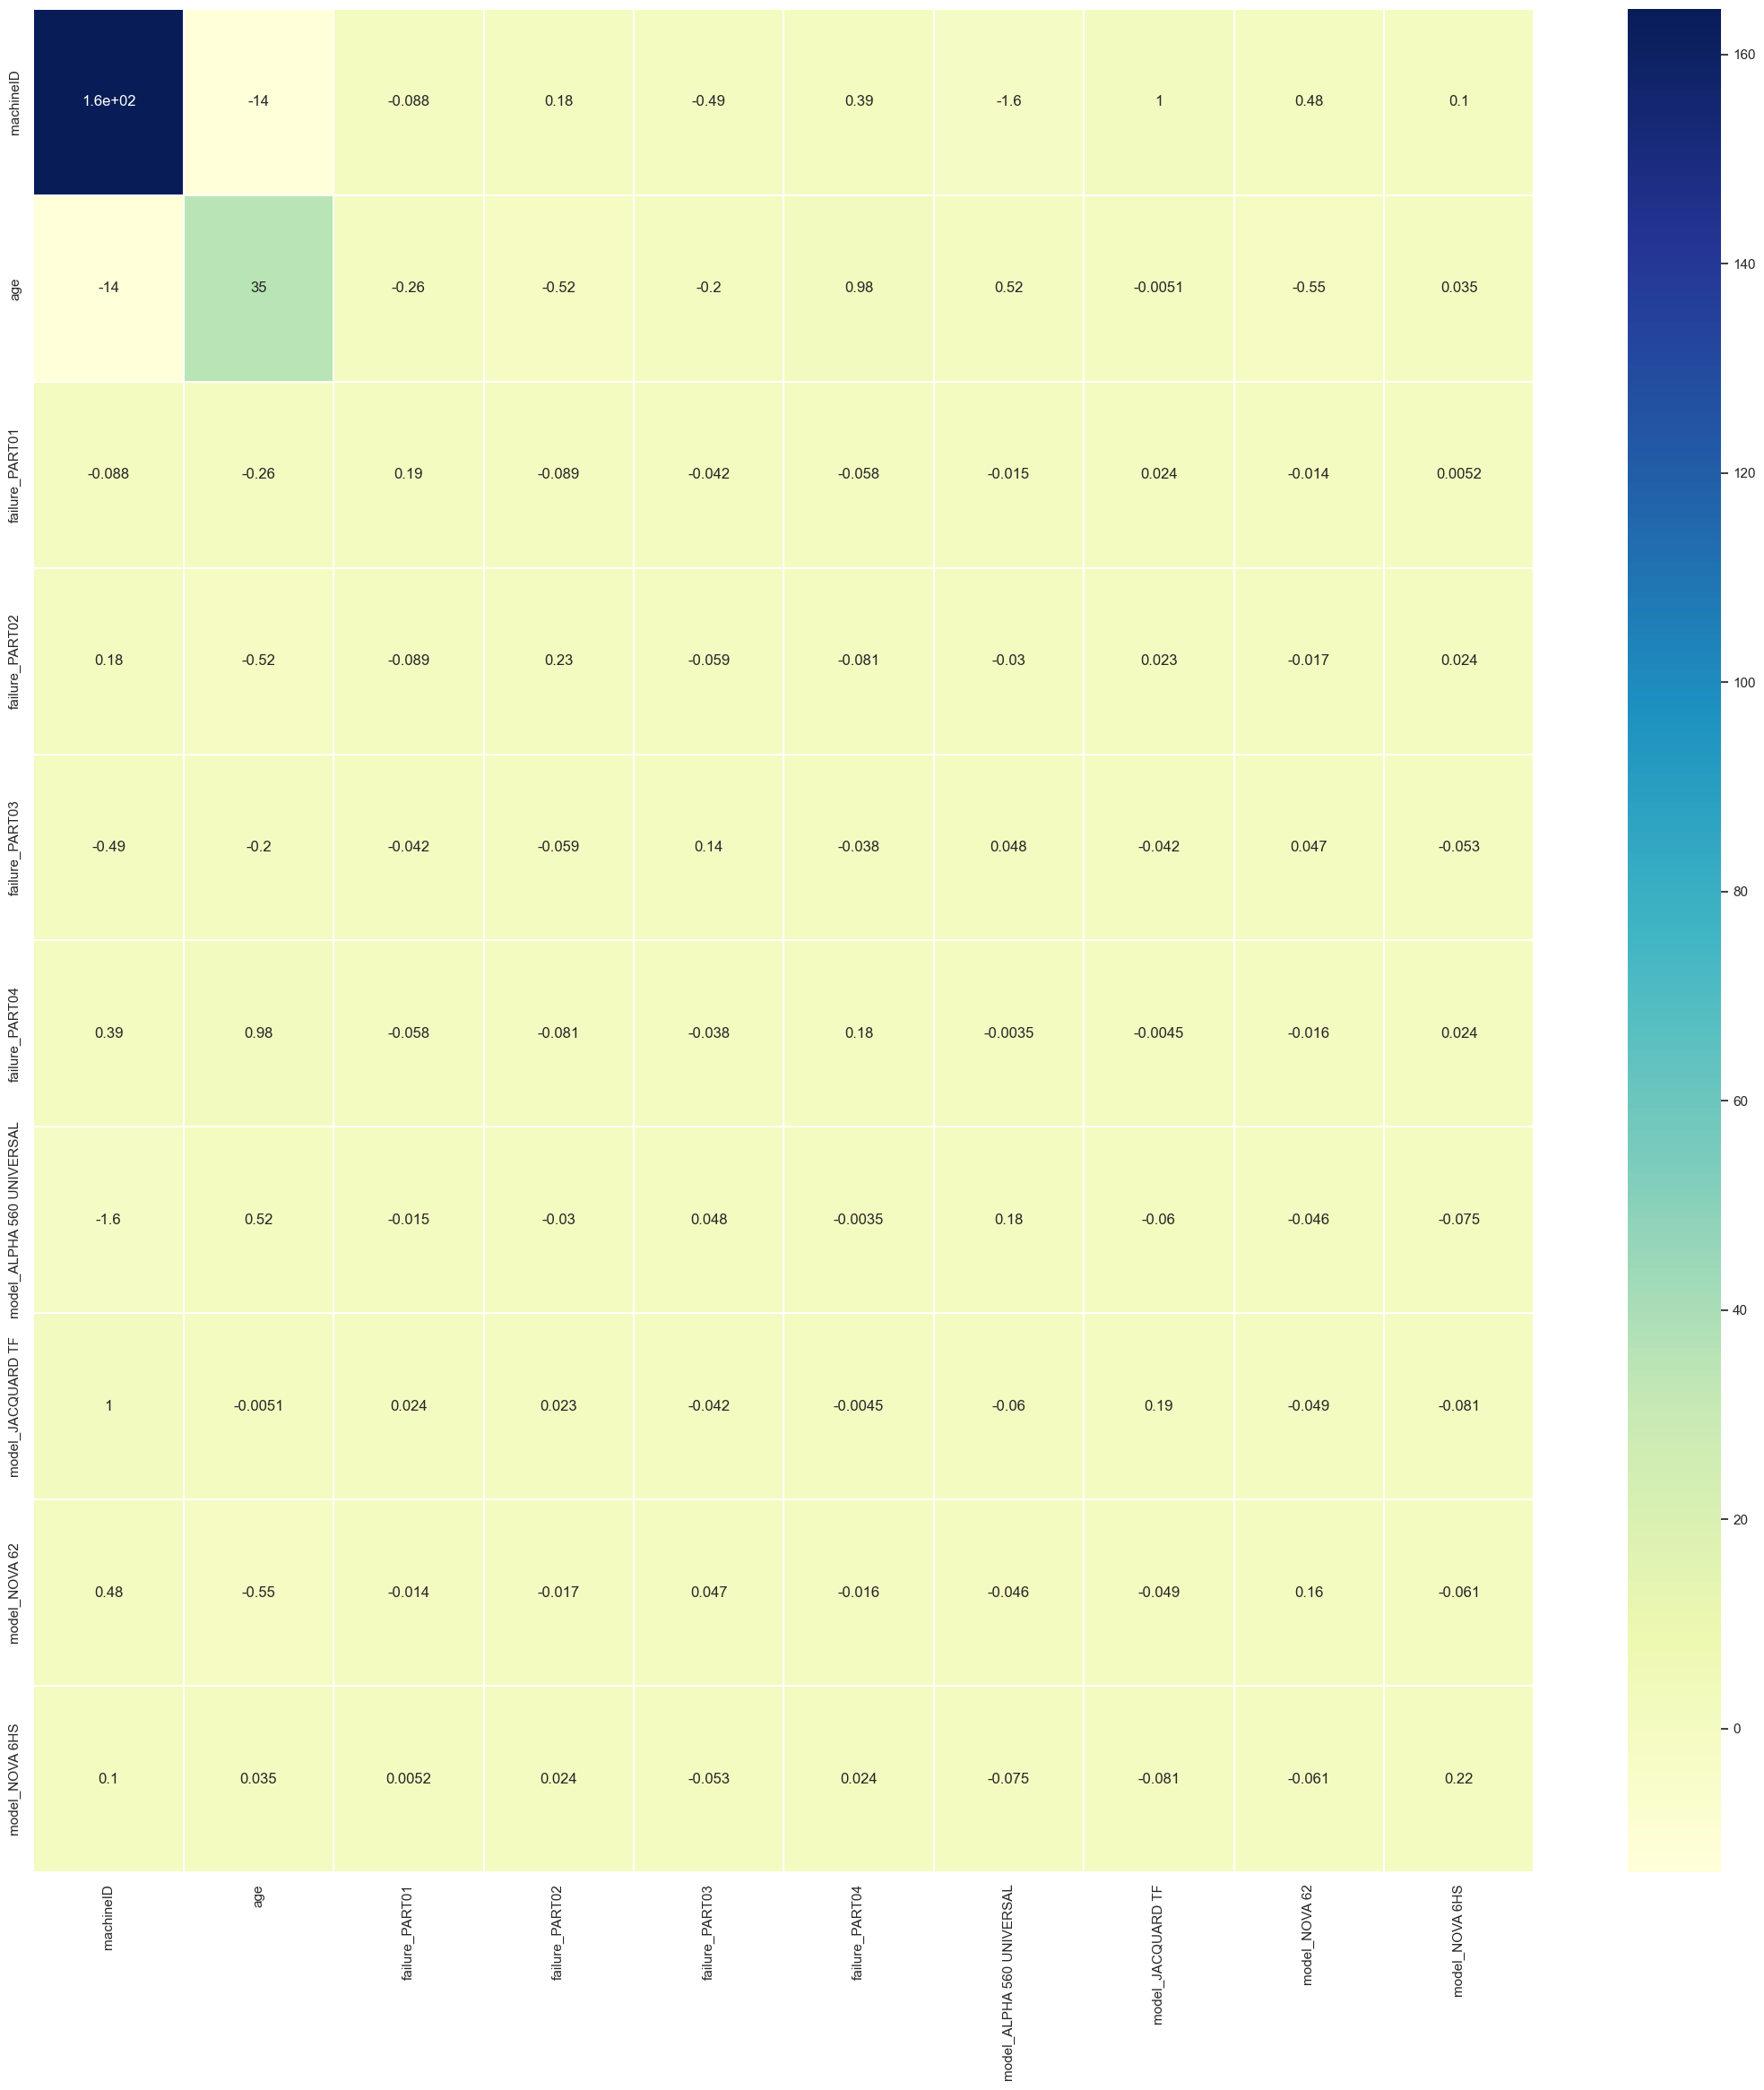

In [63]:
plt.figure(figsize=(27,27));
sns.set(rc={'figure.figsize':(15,8)})
sns.heatmap(devo_2.cov(numeric_only=True),annot=True,cmap='YlGnBu',linewidth=0.02);

In [64]:
result_2 = pd.merge(df_telemetry, df_failures, how="left", on=["machineID", "datetime"])

In [65]:
result_2

,datetime,machineID,volt,rotate,pressure,vibration,failure
0,2021-01-01 06:00:00,42,176.558913,424.624162,76.005332,43.767049,NaN
1,2021-01-01 07:00:00,42,158.282044,432.372960,110.907806,37.267114,NaN
2,2021-01-01 08:00:00,42,168.242028,454.629639,97.877007,39.709461,NaN
3,2021-01-01 09:00:00,42,180.280316,438.391022,84.440430,40.490443,NaN
4,2021-01-01 10:00:00,42,169.719531,473.055664,110.395683,41.229578,NaN
...,...,...,...,...,...,...,...
464346,2022-01-01 02:00:00,6,164.321319,447.495715,105.127837,52.249512,NaN
464347,2022-01-01 03:00:00,6,180.410465,485.467071,117.467661,37.321110,NaN
464348,2022-01-01 04:00:00,6,158.354201,389.828191,121.270784,38.201489,NaN
464349,2022-01-01 05:00:00,6,193.754368,450.198921,127.851932,39.800055,NaN


In [66]:
result_2 = pd.get_dummies(result_2, columns =  ["failure"], dtype=int)

<Axes: >

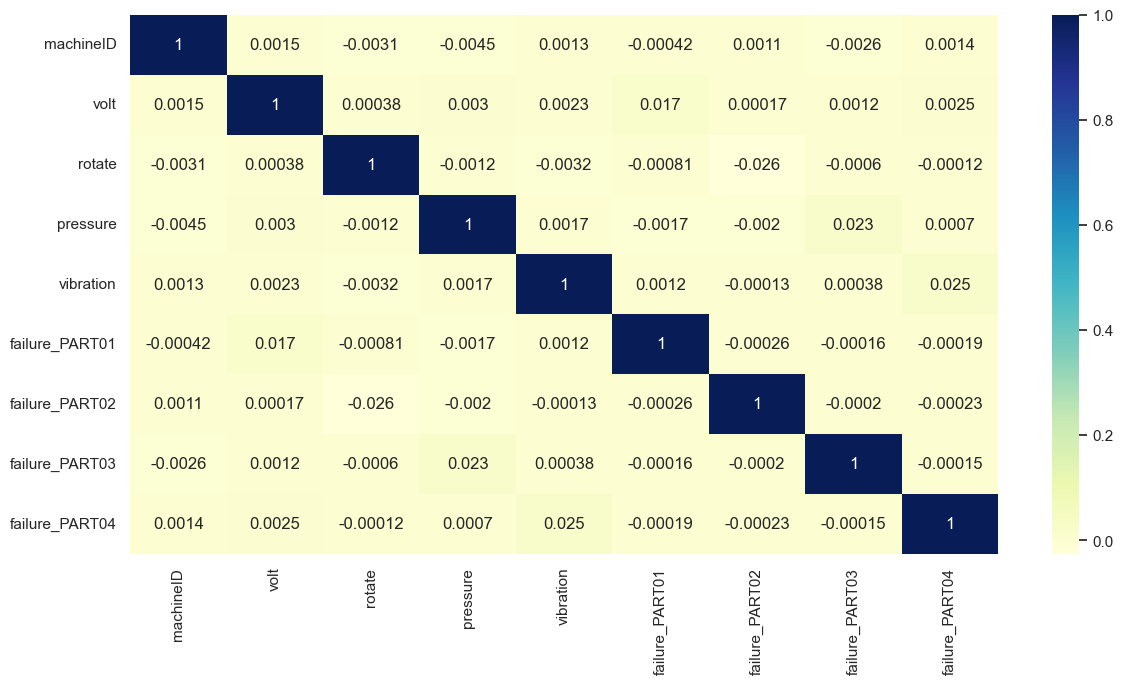

In [67]:
devo_1 = result_2
sns.set(rc={'figure.figsize':(14,7)})
sns.heatmap(devo_1.corr(numeric_only=True), annot= True, cmap='YlGnBu')

No existe ninguna correlación entre la data de telemtry y las fallas. Con más razón, usar un algoritmo de ML puede ayudar más que un análisis de datos.

# P8. Realizar preguntas de acuerdo al problema, objetivos y/o contexto actual.

1.- ¿Qué modelos fallan más?
- Se puede ver que los modelos 3 y 1 son los que más fallan, sin embargo, si comparamos el modelo 1 con el resto no hay mucha diferencia.

2.- ¿Existe alguna correlación entre tiempo y fallas?
- El gráfico indica que las máquinas más antiguas, fallan más, sobretodo las de 15 y 20 años, **sin embargo**, tenemos más máquinas del total con esas edades (antiguas 15 y 20) y el gráfico de correlación indica una correlación muy baja.

3.- ¿Existe algún componente que falle más?
- El componente 2 es el que más falla y al cuál se le da mas mantenimiento. Y todos los modelos cuentan con ese mismo componente.

4.- ¿Hay algún dato con el cual sea difícil trabajar y que sea necesario?
- Sí, datetime, al parecer vamos a tener que trabajar con ventanas de tiempo.

5.- ¿Existe alguna correlación entre la data de telemetry (voltaje, rotación, vibración y presión) con las fallas?
- Al parecer no, ni negativas ni positivas, las correlaciones son ínfimas.

#### Todas las preguntas anteriores fueron respondidas en las visualizaciones y tablas anteriores.

### Ingeniería de Características/variables

In [69]:
temp = []
fields = ["volt", "rotate", "pressure", "vibration"]

In [70]:
temp = [
    pd.pivot_table(
        df_telemetry,
        index="datetime",
        columns="machineID",
        values=col).resample("3H", closed="left", label="right").mean().unstack()
    for col in fields
]
temp[0].head()

machineID  datetime           
1          2021-01-01 09:00:00    177.984768
           2021-01-01 12:00:00    171.183131
           2021-01-01 15:00:00    166.039035
           2021-01-01 18:00:00    175.033434
           2021-01-01 21:00:00    158.352413
dtype: float64

In [74]:
telemetry_mean_3h = pd.concat(temp, axis=1) # Unimos las series.
telemetry_mean_3h.columns = [col + "mean_3h" for col in fields] # Asignamos nombres de columnas.
telemetry_mean_3h.reset_index(inplace=True) # Aplanamos el frame.
telemetry_mean_3h.head()

,machineID,datetime,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h
0,1,2021-01-01 09:00:00,177.984768,437.607619,102.575522,40.012143
1,1,2021-01-01 12:00:00,171.183131,366.877598,88.867069,40.666163
2,1,2021-01-01 15:00:00,166.039035,355.048585,103.861628,44.354543
3,1,2021-01-01 18:00:00,175.033434,345.292352,94.769390,39.473830
4,1,2021-01-01 21:00:00,158.352413,447.798406,93.451200,43.226243


In [75]:
df_telemetry.shape

(464333, 6)

In [76]:
telemetry_mean_3h.shape

(137287, 6)

In [78]:
temp_2 = []

In [82]:
temp_2 = [
    pd.pivot_table(
        df_telemetry,
        index="datetime",
        columns="machineID",
        values=col).resample("3H", closed="left", label="right").std().unstack()
    for col in fields
]
temp_2[0].head()

machineID  datetime           
1          2021-01-01 09:00:00     9.882354
           2021-01-01 12:00:00    19.295075
           2021-01-01 15:00:00     8.819676
           2021-01-01 18:00:00    22.571809
           2021-01-01 21:00:00    16.126607
dtype: float64

In [80]:
telemetry_sd_3h = pd.concat(temp_2, axis=1)
telemetry_sd_3h.columns = [i + "sd_3h" for i in fields]
telemetry_sd_3h.reset_index(inplace=True)
telemetry_sd_3h.head()

,machineID,datetime,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h
0,1,2021-01-01 09:00:00,9.882354,24.555537,9.416220,5.801181
1,1,2021-01-01 12:00:00,19.295075,17.393708,10.594657,3.200587
2,1,2021-01-01 15:00:00,8.819676,22.565357,11.052260,8.379063
3,1,2021-01-01 18:00:00,22.571809,40.857808,10.930532,8.479060
4,1,2021-01-01 21:00:00,16.126607,36.059892,6.187811,6.370973


In [81]:
telemetry_sd_3h.shape

(137287, 6)

In [84]:
temp_3 = []

In [85]:
temp_3 = [
    pd.pivot_table(
        df_telemetry,
        index="datetime",
        columns="machineID",
        values=col).rolling(window=24).mean().resample("3H", closed="left", label="right").first().unstack()
    for col in fields
]
temp_3[0].head()

machineID  datetime           
1          2021-01-01 09:00:00   NaN
           2021-01-01 12:00:00   NaN
           2021-01-01 15:00:00   NaN
           2021-01-01 18:00:00   NaN
           2021-01-01 21:00:00   NaN
dtype: float64

In [87]:
telemetry_mean_24h = pd.concat(temp_3, axis=1)
telemetry_mean_24h.columns = [i + "mean_24h" for i in fields]
telemetry_mean_24h.reset_index(inplace=True)
telemetry_mean_24h = telemetry_mean_24h.loc[-telemetry_mean_24h["voltmean_24h"].isnull()]

In [90]:
telemetry_mean_24h.head(16)

,machineID,datetime,voltmean_24h,rotatemean_24h,pressuremean_24h,vibrationmean_24h
7,1,2021-01-02 06:00:00,170.299151,410.106823,97.134016,40.959686
8,1,2021-01-02 09:00:00,170.514516,410.496539,96.997006,41.118438
9,1,2021-01-02 12:00:00,171.619836,420.734019,97.525164,41.159908
10,1,2021-01-02 15:00:00,169.429630,432.332198,97.348955,41.039213
11,1,2021-01-02 18:00:00,168.729852,439.039268,96.684887,40.511113
12,1,2021-01-02 21:00:00,167.219631,454.674961,99.391370,40.251660
13,1,2021-01-03 00:00:00,170.483861,453.801839,99.339377,40.257151
14,1,2021-01-03 03:00:00,169.455373,450.998222,98.996711,39.617433
15,1,2021-01-03 06:00:00,171.344285,445.074402,99.603981,39.024653
16,1,2021-01-03 09:00:00,168.735391,441.759687,99.253672,38.549589


In [92]:
temp_4 = []

temp_4 = [
    pd.pivot_table(
        df_telemetry,
        index="datetime",
        columns="machineID",
        values=col).rolling(window=24).std().resample("3H", closed="left", label="right").first().unstack(level=-1)
    for col in fields
]
temp_4[0].head()

machineID  datetime           
1          2021-01-01 09:00:00   NaN
           2021-01-01 12:00:00   NaN
           2021-01-01 15:00:00   NaN
           2021-01-01 18:00:00   NaN
           2021-01-01 21:00:00   NaN
dtype: float64

In [93]:
telemetry_sd_24h = pd.concat(temp_4, axis=1)
telemetry_sd_24h.columns = [i + "sd_24h" for i in fields]
telemetry_sd_24h.reset_index(inplace=True)
telemetry_sd_24h = telemetry_sd_24h.loc[-telemetry_sd_24h["voltsd_24h"].isnull()]

In [94]:
telemetry_sd_24h.head(10)

,machineID,datetime,voltsd_24h,rotatesd_24h,pressuresd_24h,vibrationsd_24h
7,1,2021-01-02 06:00:00,16.490101,53.500713,8.429203,5.530246
8,1,2021-01-02 09:00:00,16.486754,53.793502,8.306793,5.603681
9,1,2021-01-02 12:00:00,18.262938,58.189640,6.959186,5.377798
10,1,2021-01-02 15:00:00,18.900670,55.478868,6.771459,5.127402
11,1,2021-01-02 18:00:00,19.800134,55.121375,5.484112,4.932281
12,1,2021-01-02 21:00:00,18.751248,50.870861,6.478913,5.417204
13,1,2021-01-03 00:00:00,18.551911,51.442506,7.225496,5.446365
14,1,2021-01-03 03:00:00,17.917417,52.939298,7.750587,5.768885
15,1,2021-01-03 06:00:00,18.003726,58.935557,7.959774,6.340399
16,1,2021-01-03 09:00:00,16.655843,58.225785,8.259809,6.140394


In [95]:
telemetry_feat = pd.concat([
    telemetry_mean_3h,
    telemetry_sd_3h.iloc[:, 2:6],
    telemetry_mean_24h.iloc[:, 2:6],
    telemetry_sd_24h.iloc[:, 2:6]], axis=1).dropna()
telemetry_feat.head()

,machineID,datetime,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,voltmean_24h,rotatemean_24h,pressuremean_24h,vibrationmean_24h,voltsd_24h,rotatesd_24h,pressuresd_24h,vibrationsd_24h
7,1,2021-01-02 06:00:00,180.857530,470.172113,94.280586,42.585979,22.634509,22.853920,1.881499,6.693348,170.299151,410.106823,97.134016,40.959686,16.490101,53.500713,8.429203,5.530246
8,1,2021-01-02 09:00:00,190.106712,472.050647,101.401050,41.230043,15.099202,19.501492,2.798117,4.135271,170.514516,410.496539,96.997006,41.118438,16.486754,53.793502,8.306793,5.603681
9,1,2021-01-02 12:00:00,156.143089,473.039256,94.087971,45.381425,15.992174,62.777583,4.986140,5.430938,171.619836,420.734019,97.525164,41.159908,18.262938,58.189640,6.959186,5.377798
10,1,2021-01-02 15:00:00,158.458223,422.208281,98.615362,38.839316,19.404615,83.613846,4.573212,2.846899,169.429630,432.332198,97.348955,41.039213,18.900670,55.478868,6.771459,5.127402
11,1,2021-01-02 18:00:00,160.116287,444.272739,107.573098,36.189106,10.283735,32.058147,10.977006,1.199312,168.729852,439.039268,96.684887,40.511113,19.800134,55.121375,5.484112,4.932281


In [96]:
telemetry_feat.describe()

,machineID,datetime,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,voltmean_24h,rotatemean_24h,pressuremean_24h,vibrationmean_24h,voltsd_24h,rotatesd_24h,pressuresd_24h,vibrationsd_24h
count,136911.00000,136911,136911.000000,136911.000000,136911.000000,136911.000000,136911.000000,136911.000000,136911.000000,136911.000000,136911.000000,136911.000000,136911.000000,136911.000000,136911.000000,136911.000000,136911.000000,136911.000000
mean,24.00000,2021-07-03 06:00:00,170.748936,446.646166,100.852720,40.389636,13.319198,44.419563,8.878863,4.439653,170.750583,446.644701,100.853336,40.389519,14.916940,49.950608,10.045689,4.997556
min,1.00000,2021-01-02 06:00:00,125.532506,211.811184,73.951948,26.569635,0.025509,0.078991,0.043181,0.015278,156.645540,266.010419,91.556695,35.060087,7.100851,21.914634,4.145308,2.333070
25%,12.00000,2021-04-03 06:00:00,164.445378,427.627601,96.252877,38.150964,8.032612,26.894218,5.350282,2.683167,168.045919,441.583413,98.683368,39.365028,13.355872,44.672948,8.914856,4.455703
50%,24.00000,2021-07-03 06:00:00,170.412737,448.365706,100.214078,40.148966,12.503692,41.754574,8.345720,4.178054,170.198270,449.294257,100.106202,40.078854,14.851148,49.608438,9.919416,4.954330
75%,36.00000,2021-10-02 06:00:00,176.608780,468.505166,104.446567,42.234213,17.706062,59.052009,11.773637,5.899558,172.457274,456.407417,101.617514,40.840499,16.388642,54.819602,10.984902,5.479479
max,47.00000,2022-01-01 06:00:00,228.679545,586.682904,162.298051,66.535850,58.444332,179.637880,34.380664,18.305595,209.508635,495.814467,152.215627,61.153180,27.335132,103.819404,21.646154,10.162724
std,13.56471,NaN,9.449074,33.205146,7.376022,3.463897,6.980374,23.201293,4.657461,2.317883,4.676296,18.158506,4.678871,2.043183,2.263075,7.658553,1.719286,0.797843


In [113]:
OHE_df.head(15)

,datetime,machineID,error1,error2,error3,error4,error5
1160,2021-01-01 06:00:00,4,0,0,0,1,0
206,2021-01-01 08:00:00,9,0,0,0,1,0
627,2021-01-01 10:00:00,24,0,1,0,0,0
1118,2021-01-01 12:00:00,1,0,1,0,0,0
1740,2021-01-01 12:00:00,16,0,0,1,0,0
161,2021-01-01 20:00:00,31,1,0,0,0,0
331,2021-01-02 04:00:00,47,0,1,0,0,0
767,2021-01-02 13:00:00,43,0,0,1,0,0
967,2021-01-03 02:00:00,27,0,1,0,0,0
1119,2021-01-03 04:00:00,1,1,0,0,0,0


In [112]:
OHE_df.sort_values(by=['datetime']).head(18)

#1830 filas

,datetime,machineID,error1,error2,error3,error4,error5
1160,2021-01-01 06:00:00,4,0,0,0,1,0
206,2021-01-01 08:00:00,9,0,0,0,1,0
627,2021-01-01 10:00:00,24,0,1,0,0,0
1118,2021-01-01 12:00:00,1,0,1,0,0,0
1740,2021-01-01 12:00:00,16,0,0,1,0,0
161,2021-01-01 20:00:00,31,1,0,0,0,0
331,2021-01-02 04:00:00,47,0,1,0,0,0
767,2021-01-02 13:00:00,43,0,0,1,0,0
967,2021-01-03 02:00:00,27,0,1,0,0,0
1119,2021-01-03 04:00:00,1,1,0,0,0,0


In [103]:
error_count_grouped = OHE_df.groupby(["machineID", "datetime"]).sum().reset_index()
error_count_grouped.head(15)

,machineID,datetime,error1,error2,error3,error4,error5
0,1,2021-01-01 12:00:00,0,1,0,0,0
1,1,2021-01-03 04:00:00,1,0,0,0,0
2,1,2021-01-17 17:00:00,0,0,0,1,0
3,1,2021-02-15 03:00:00,0,0,1,0,0
4,1,2021-02-25 05:00:00,1,0,0,0,0
5,1,2021-02-25 07:00:00,0,0,1,0,0
6,1,2021-03-23 06:00:00,1,0,0,0,0
7,1,2021-04-21 03:00:00,1,0,0,0,0
8,1,2021-04-26 02:00:00,0,0,1,0,0
9,1,2021-04-29 03:00:00,0,0,1,0,0


Nos aseguramos que los errores que se tienen el el dataframe df_errors estén relacionados con el dataframe df_telemetry, osease que no haya errores de df_errors que los sensores del df_telemetry no hayan captado, por ejemplo, si se captura un error del día 01/08/2024 pero el df_telemetry no tiene un record con dicha fecha, entonces no podemos saber cuál fue la razón del error.

In [116]:
error_count_filtered = df_telemetry[["datetime", "machineID"]].merge(
    error_count_grouped,
    on=["machineID", "datetime"],
    how="left"
).fillna(0.0)

error_count_filtered.head()

,datetime,machineID,error1,error2,error3,error4,error5
0,2021-01-01 06:00:00,42,0.0,0.0,0.0,0.0,0.0
1,2021-01-01 07:00:00,42,0.0,0.0,0.0,0.0,0.0
2,2021-01-01 08:00:00,42,0.0,0.0,0.0,0.0,0.0
3,2021-01-01 09:00:00,42,0.0,0.0,0.0,0.0,0.0
4,2021-01-01 10:00:00,42,0.0,0.0,0.0,0.0,0.0


In [123]:

temp_5 = []
fields = ["error1","error2","error3","error4","error5"]

temp_5 = [
    pd.pivot_table(
        error_count_filtered,
        index="datetime",
        columns="machineID",
        values=col).rolling(window=24).sum().resample("3H", closed="left", label="right").first().unstack()
    for col in fields
]

temp_5[0].head(10)

machineID  datetime           
1          2021-01-01 09:00:00    NaN
           2021-01-01 12:00:00    NaN
           2021-01-01 15:00:00    NaN
           2021-01-01 18:00:00    NaN
           2021-01-01 21:00:00    NaN
           2021-01-02 00:00:00    NaN
           2021-01-02 03:00:00    NaN
           2021-01-02 06:00:00    0.0
           2021-01-02 09:00:00    0.0
           2021-01-02 12:00:00    0.0
dtype: float64

In [127]:
error_count_total = pd.concat(temp_5, axis=1)
error_count_total.columns = [i + "_count" for i in fields]
error_count_total.reset_index(inplace=True)
error_count_total = error_count_total.dropna()
error_count_total.head()

,machineID,datetime,error1_count,error2_count,error3_count,error4_count,error5_count
7,1,2021-01-02 06:00:00,0.0,1.0,0.0,0.0,0.0
8,1,2021-01-02 09:00:00,0.0,1.0,0.0,0.0,0.0
9,1,2021-01-02 12:00:00,0.0,1.0,0.0,0.0,0.0
10,1,2021-01-02 15:00:00,0.0,0.0,0.0,0.0,0.0
11,1,2021-01-02 18:00:00,0.0,0.0,0.0,0.0,0.0


In [128]:
error_count_total.shape

(136958, 7)

In [134]:
error_count_total["error1_count"].unique()

array([0., 1., 2.])

In [131]:
error_count_total.describe()

,machineID,datetime,error1_count,error2_count,error3_count,error4_count,error5_count
count,136958.000000,136958,136958.000000,136958.000000,136958.000000,136958.000000,136958.000000
mean,24.000000,2021-07-03 07:30:00,0.028724,0.026512,0.022525,0.018984,0.009872
min,1.000000,2021-01-02 06:00:00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,2021-04-03 06:00:00,0.000000,0.000000,0.000000,0.000000,0.000000
50%,24.000000,2021-07-03 07:30:00,0.000000,0.000000,0.000000,0.000000,0.000000
75%,36.000000,2021-10-02 09:00:00,0.000000,0.000000,0.000000,0.000000,0.000000
max,47.000000,2022-01-01 09:00:00,2.000000,2.000000,2.000000,2.000000,2.000000
std,13.564709,NaN,0.169375,0.162370,0.150048,0.137641,0.099380


Reemplazos, esta característica nos pueda ayudar a saber si el tiempo desde que se reemplazó un componente de alguna máquina influye en un posible error. Lo lógico en la ingeniería de mantenimiento es que si un componente no se cambió en mucho tiempo, entonces este tenga una mayor probabilidad de fallar.

In [153]:
df_maint.head()

,datetime,machineID,comp
0,2020-07-31,1,PART01
1,2020-08-30,1,PART04
2,2020-10-29,1,PART02
3,2020-11-28,1,PART03
4,2021-01-23,1,PART03


In [154]:
df_maint_2 = pd.get_dummies(df_maint, columns =  ["comp"], dtype=int)
df_maint_2.columns = ["datetime", "machineID", "Part_1", "Part_2", "Part_3", "Part_4"]
df_maint_2.head()

,datetime,machineID,Part_1,Part_2,Part_3,Part_4
0,2020-07-31,1,1,0,0,0
1,2020-08-30,1,0,0,0,1
2,2020-10-29,1,0,1,0,0
3,2020-11-28,1,0,0,1,0
4,2021-01-23,1,0,0,1,0


In [155]:
df_maint_2 = df_maint_2.groupby(["machineID", "datetime"]).sum().reset_index()
df_maint_2.head()

,machineID,datetime,Part_1,Part_2,Part_3,Part_4
0,1,2020-07-31,1,0,0,0
1,1,2020-08-30,0,0,0,1
2,1,2020-10-29,0,1,0,0
3,1,2020-11-28,0,0,1,0
4,1,2021-01-23,0,0,1,0


In [156]:
df_maint_2 = df_telemetry[["datetime", "machineID"]].merge(
    df_maint_2,
    on=["datetime", "machineID"],
    how="outer").fillna(0).sort_values(by=["machineID", "datetime"]
)
df_maint_2.head()

,datetime,machineID,Part_1,Part_2,Part_3,Part_4
464333,2020-07-31 00:00:00,1,1.0,0.0,0.0,0.0
464334,2020-08-30 00:00:00,1,0.0,0.0,0.0,1.0
464335,2020-10-29 00:00:00,1,0.0,1.0,0.0,0.0
464336,2020-11-28 00:00:00,1,0.0,0.0,1.0,0.0
315396,2021-01-01 06:00:00,1,0.0,0.0,0.0,0.0


In [157]:
components = ["Part_1", "Part_2", "Part_3", "Part_4"]
for comp in components:
    df_maint_2.loc[df_maint_2[comp] < 1, comp] = None
    df_maint_2.loc[-df_maint_2[comp].isnull(), comp] = df_maint_2.loc[-df_maint_2[comp].isnull(), "datetime"]
    df_maint_2[comp] = pd.to_datetime(df_maint_2[comp].fillna(method="ffill"))

df_maint_2 = df_maint_2.loc[df_maint_2["datetime"] > pd.to_datetime("2021-01-01")]

,datetime,machineID,Part_1,Part_2,Part_3,Part_4
315396,2021-01-01 06:00:00,1,2020-07-31,2020-10-29,2020-11-28,2020-08-30
315397,2021-01-01 07:00:00,1,2020-07-31,2020-10-29,2020-11-28,2020-08-30
315398,2021-01-01 08:00:00,1,2020-07-31,2020-10-29,2020-11-28,2020-08-30
315399,2021-01-01 09:00:00,1,2020-07-31,2020-10-29,2020-11-28,2020-08-30
315400,2021-01-01 10:00:00,1,2020-07-31,2020-10-29,2020-11-28,2020-08-30
315401,2021-01-01 11:00:00,1,2020-07-31,2020-10-29,2020-11-28,2020-08-30
315402,2021-01-01 12:00:00,1,2020-07-31,2020-10-29,2020-11-28,2020-08-30
315403,2021-01-01 13:00:00,1,2020-07-31,2020-10-29,2020-11-28,2020-08-30
315404,2021-01-01 14:00:00,1,2020-07-31,2020-10-29,2020-11-28,2020-08-30
315405,2021-01-01 15:00:00,1,2020-07-31,2020-10-29,2020-11-28,2020-08-30


In [159]:
df_maint_2.head(15)

,datetime,machineID,Part_1,Part_2,Part_3,Part_4
315396,2021-01-01 06:00:00,1,2020-07-31,2020-10-29,2020-11-28,2020-08-30
315397,2021-01-01 07:00:00,1,2020-07-31,2020-10-29,2020-11-28,2020-08-30
315398,2021-01-01 08:00:00,1,2020-07-31,2020-10-29,2020-11-28,2020-08-30
315399,2021-01-01 09:00:00,1,2020-07-31,2020-10-29,2020-11-28,2020-08-30
315400,2021-01-01 10:00:00,1,2020-07-31,2020-10-29,2020-11-28,2020-08-30
315401,2021-01-01 11:00:00,1,2020-07-31,2020-10-29,2020-11-28,2020-08-30
315402,2021-01-01 12:00:00,1,2020-07-31,2020-10-29,2020-11-28,2020-08-30
315403,2021-01-01 13:00:00,1,2020-07-31,2020-10-29,2020-11-28,2020-08-30
315404,2021-01-01 14:00:00,1,2020-07-31,2020-10-29,2020-11-28,2020-08-30
315405,2021-01-01 15:00:00,1,2020-07-31,2020-10-29,2020-11-28,2020-08-30


In [160]:
for comp in components: 
    df_maint_2[comp] = (df_maint_2["datetime"] - pd.to_datetime(df_maint_2[comp])) / np.timedelta64(1, "D")
    
df_maint_2.head()

,datetime,machineID,Part_1,Part_2,Part_3,Part_4
315396,2021-01-01 06:00:00,1,154.250000,64.250000,34.250000,124.250000
315397,2021-01-01 07:00:00,1,154.291667,64.291667,34.291667,124.291667
315398,2021-01-01 08:00:00,1,154.333333,64.333333,34.333333,124.333333
315399,2021-01-01 09:00:00,1,154.375000,64.375000,34.375000,124.375000
315400,2021-01-01 10:00:00,1,154.416667,64.416667,34.416667,124.416667


In [161]:
df_maint_2.describe()

,datetime,machineID,Part_1,Part_2,Part_3,Part_4
count,464333,464333.000000,464333.000000,464333.000000,464333.000000,464333.000000
mean,2021-07-02 18:00:00.000000256,24.188679,50.106600,52.663054,50.951663,52.801491
min,2021-01-01 06:00:00,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2021-04-02 12:00:00,12.000000,13.166667,11.500000,13.125000,13.083333
50%,2021-07-02 18:00:00,25.000000,32.416667,28.291667,31.916667,32.250000
75%,2021-10-02 00:00:00,36.000000,66.833333,65.916667,64.708333,66.041667
max,2022-01-01 06:00:00,47.000000,315.958333,339.958333,318.958333,394.958333
std,NaN,13.878268,53.414572,63.784628,56.752044,60.685702


Durante esta etapa de ingeniería de datos, podemos ver que la "parte2" es la que se cambia en periodos más largos de tiempo, sin embargo, es la que más falla, acá quizás podamos ver algún tipo de correlación entre "fallas" y "mantto de las partes", específicamente de la "part2".

In [163]:
## Concatenamos el DF de "máquinas"
pre_final_feat = telemetry_feat.merge(error_count_total, on=["datetime", "machineID"], how="left")
pre_final_feat = pre_final_feat.merge(df_maint_2, on=["datetime", "machineID"], how="left")
pre_final_feat = pre_final_feat.merge(df_machines, on=["machineID"], how="left")
pre_final_feat.head()

,machineID,datetime,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,...,error2_count,error3_count,error4_count,error5_count,Part_1,Part_2,Part_3,Part_4,model,age
0,1,2021-01-02 06:00:00,180.857530,470.172113,94.280586,42.585979,22.634509,22.853920,1.881499,6.693348,...,1.0,0.0,0.0,0.0,155.250,65.250,35.250,125.250,JACQUARD TF,2
1,1,2021-01-02 09:00:00,190.106712,472.050647,101.401050,41.230043,15.099202,19.501492,2.798117,4.135271,...,1.0,0.0,0.0,0.0,155.375,65.375,35.375,125.375,JACQUARD TF,2
2,1,2021-01-02 12:00:00,156.143089,473.039256,94.087971,45.381425,15.992174,62.777583,4.986140,5.430938,...,1.0,0.0,0.0,0.0,155.500,65.500,35.500,125.500,JACQUARD TF,2
3,1,2021-01-02 15:00:00,158.458223,422.208281,98.615362,38.839316,19.404615,83.613846,4.573212,2.846899,...,0.0,0.0,0.0,0.0,155.625,65.625,35.625,125.625,JACQUARD TF,2
4,1,2021-01-02 18:00:00,160.116287,444.272739,107.573098,36.189106,10.283735,32.058147,10.977006,1.199312,...,0.0,0.0,0.0,0.0,155.750,65.750,35.750,125.750,JACQUARD TF,2


In [166]:
## Concatenamos el DF de 
model_dummies = pd.get_dummies(pre_final_feat, columns = ["model"], dtype=int)
final_feat = pd.concat([pre_final_feat, model_dummies], axis=1)
final_feat.drop("model", axis=1, inplace=True)

In [168]:
final_feat.head(4)

,machineID,datetime,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,...,error5_count,Part_1,Part_2,Part_3,Part_4,age,model_ALPHA 560 UNIVERSAL,model_JACQUARD TF,model_NOVA 62,model_NOVA 6HS
0,1,2021-01-02 06:00:00,180.857530,470.172113,94.280586,42.585979,22.634509,22.853920,1.881499,6.693348,...,0.0,155.250,65.250,35.250,125.250,2,0,1,0,0
1,1,2021-01-02 09:00:00,190.106712,472.050647,101.401050,41.230043,15.099202,19.501492,2.798117,4.135271,...,0.0,155.375,65.375,35.375,125.375,2,0,1,0,0
2,1,2021-01-02 12:00:00,156.143089,473.039256,94.087971,45.381425,15.992174,62.777583,4.986140,5.430938,...,0.0,155.500,65.500,35.500,125.500,2,0,1,0,0
3,1,2021-01-02 15:00:00,158.458223,422.208281,98.615362,38.839316,19.404615,83.613846,4.573212,2.846899,...,0.0,155.625,65.625,35.625,125.625,2,0,1,0,0


In [171]:
df_failures

,datetime,machineID,failure
0,2021-03-19 06:00:00,42,PART01
1,2021-03-19 06:00:00,42,PART02
2,2021-04-18 06:00:00,42,PART02
3,2021-12-29 06:00:00,42,PART02
4,2021-01-07 06:00:00,44,PART02
...,...,...,...
349,2021-07-29 06:00:00,6,PART03
350,2021-08-13 06:00:00,6,PART01
351,2021-08-28 06:00:00,6,PART02
352,2021-10-27 06:00:00,6,PART02


In [173]:
labeled_features = final_feat.merge(pre_final_feat, on=["datetime", "machineID"], how="left")

labeled_features["failure"] = labeled_features["failure"].astype(object).fillna(method="bfill", limit=7)
labeled_features["failure"] = labeled_features["failure"].fillna("none")
labeled_features["failure"] = labeled_features["failure"].astype("category")
labeled_features.head()

ValueError: The column label 'datetime' is not unique.

In [176]:
labeled_features = final_feat.merge(pre_final_feat, how="left", on=["datetime", "machineID"])
# dates.merge(data_holes, how='left', on=['name','week'])

ValueError: The column label 'datetime' is not unique.